<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/day08_regularization/MachineLearning8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns

## Loading Dataset and Creating Pipeline

In [2]:
X = load_breast_cancer().data
y = load_breast_cancer().target

In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [6]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']  # چون l1 با liblinear سازگاره
}

## Grid Search

To find the best parameters for the model.

In [7]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='accuracy')

As seen the best C is 0.1 which isn't too high. The higher the C, the more overfitted the model. We use C to prevent overfitting.

In [8]:
grid.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

In [9]:
grid.best_score_

np.float64(0.9824406148113647)

## L1 and L2 Regularization

L1 and L2 regularization are techniques used in machine learning to prevent overfitting and improve model generalization by adding a penalty term to the cost function.

In [17]:
accs_l1 = []
c = [0.01, 0.1, 1, 10]

 L1 regularization, also known as Lasso, adds the absolute value of the coefficients as a penalty, leading to sparse models where some coefficients may be driven to zero, effectively performing feature selection.

In [18]:
for c_value in c:
  pipe = make_pipeline(StandardScaler(), LogisticRegression(C=c_value, penalty='l2', solver='liblinear'))
  accs_l1.append(cross_val_score(pipe, X, y, cv=5).mean())

<Axes: >

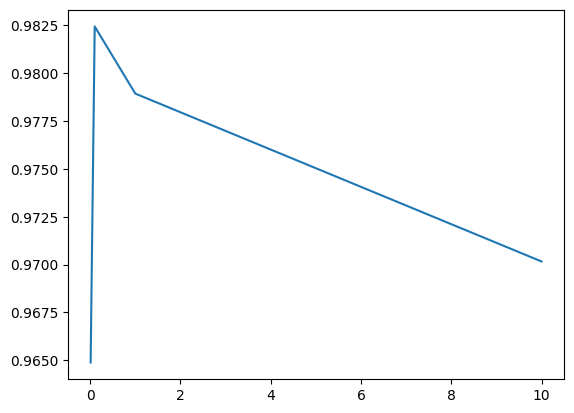

In [20]:
sns.lineplot(x=c, y=accs_l1)

In [21]:
accs_l2 = []

 L2 regularization, also known as Ridge, adds the squared value of the coefficients as a penalty, shrinking coefficients towards zero but not exactly to zero.

In [22]:
for c_value in c:
  pipe = make_pipeline(StandardScaler(), LogisticRegression(C=c_value, penalty='l2', solver='liblinear'))
  accs_l2.append(cross_val_score(pipe, X, y, cv=5).mean())

<Axes: >

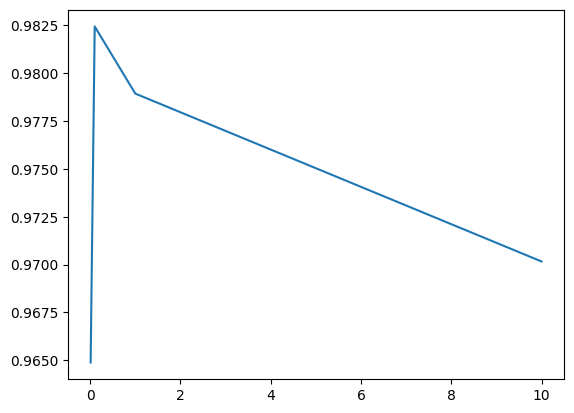

In [23]:
sns.lineplot(x=c, y=accs_l2)